# **1. Pendahuluan**

# 💓 Prediksi Penyakit Jantung dengan Machine Learning

Penyakit jantung merupakan salah satu penyebab kematian terbesar di dunia. Deteksi dini terhadap potensi penyakit jantung sangat penting agar tindakan pencegahan dapat segera dilakukan. Dalam proyek ini, kita akan membangun model machine learning untuk memprediksi apakah seseorang berisiko terkena penyakit jantung berdasarkan data klinis mereka.

## 🎯 Tujuan Proyek
Membangun model klasifikasi untuk memprediksi keberadaan penyakit jantung berdasarkan fitur-fitur pasien seperti usia, jenis kelamin, tekanan darah, dan hasil tes laboratorium.

---


# **2. Import Library**

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


# **3. Load Dataset**

## 📂 Load Dataset

Dataset yang digunakan berasal dari Kaggle: [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)


In [9]:
# Gantilah path dengan lokasi file dataset kalian
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# **4. Data Understanding & Exploratory Data Analysis (EDA)**

## 🔍 Data Understanding

Mari kita lihat bentuk umum dataset dan informasi statistik awal.


In [10]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


### 🔬 Distribusi Target


In [14]:
# Rename kolom agar konsisten
df.rename(columns={'Heart Disease': 'target'}, inplace=True)

# Cek nilai unik dari target
print(df['target'].unique())


['Presence' 'Absence']


In [15]:
# Mapping target: Presence → 1, Absence → 0
df['target'] = df['target'].map({'Absence': 0, 'Presence': 1})


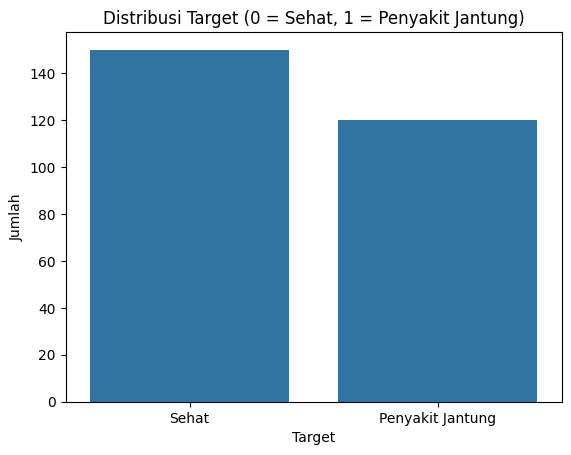

In [16]:
sns.countplot(x='target', data=df)
plt.title('Distribusi Target (0 = Sehat, 1 = Penyakit Jantung)')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Sehat', 'Penyakit Jantung'])
plt.show()


### 📈 Korelasi antar fitur


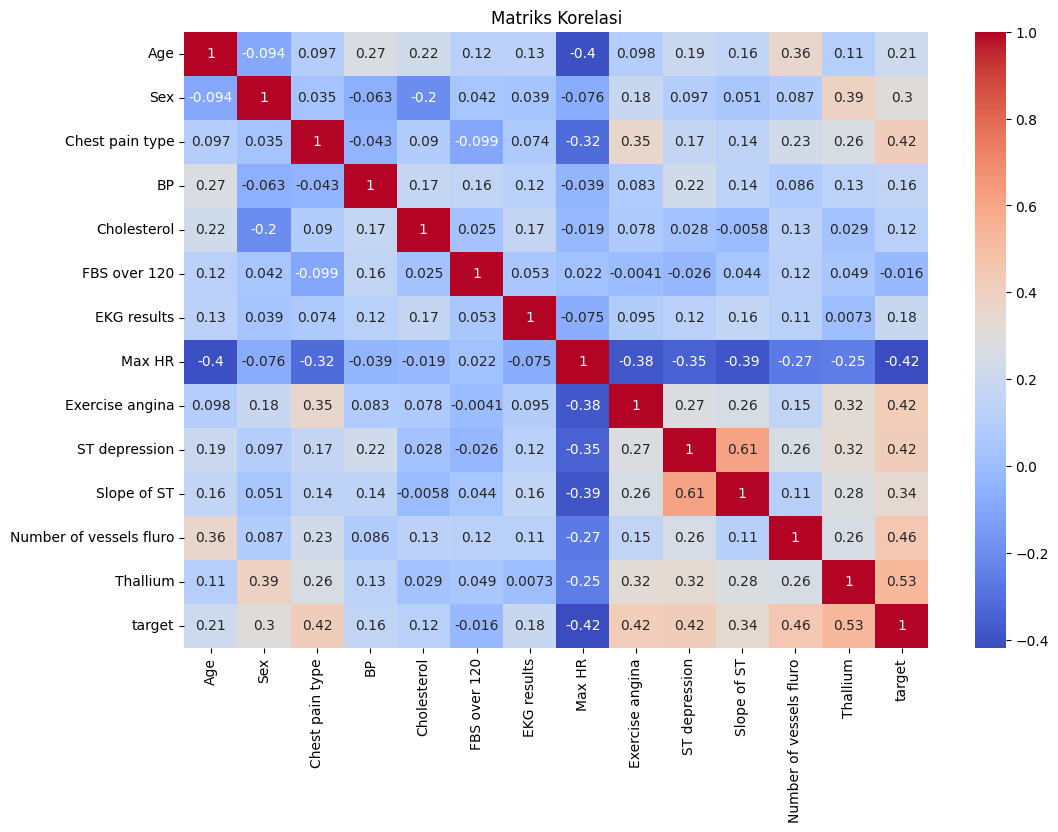

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


# **5. Data Preparation**

## 🧼 Data Preparation

Kami akan:
- Memisahkan fitur dan target
- Standarisasi fitur numerik
- Split data ke dalam training dan testing set


In [18]:
X = df.drop('target', axis=1)
y = df['target']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# **6. Modeling**

## 🤖 Modeling

Kami akan mencoba tiga model:
1. Logistic Regression
2. Random Forest
3. XGBoost


In [19]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


# 7. Evaluation

## 📊 Evaluasi Model

Mari kita bandingkan akurasi dan metrik evaluasi lainnya dari ketiga model.


In [20]:
def evaluate_model(name, y_test, y_pred):
    print(f"📌 {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print('-'*50)

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54

Confusion Matrix:
[[24  6]
 [ 2 22]]
--------------------------------------------------
📌 Random Forest
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54

Confusion Matrix:
[[24  6]
 [ 4 20]]
--------------------------------------------------
📌 XGBoost
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1 

# **8. Model Comparison & Final Model**

## 🏁 Model Terbaik

Berdasarkan evaluasi di atas, kita dapat memilih model dengan performa terbaik. Jika selisih akurasi sangat kecil, kita bisa memilih model yang lebih sederhana untuk deployment (seperti Logistic Regression).

Tambahkan juga ROC Curve untuk membandingkan model secara visual.


# **9. ROC Curve**

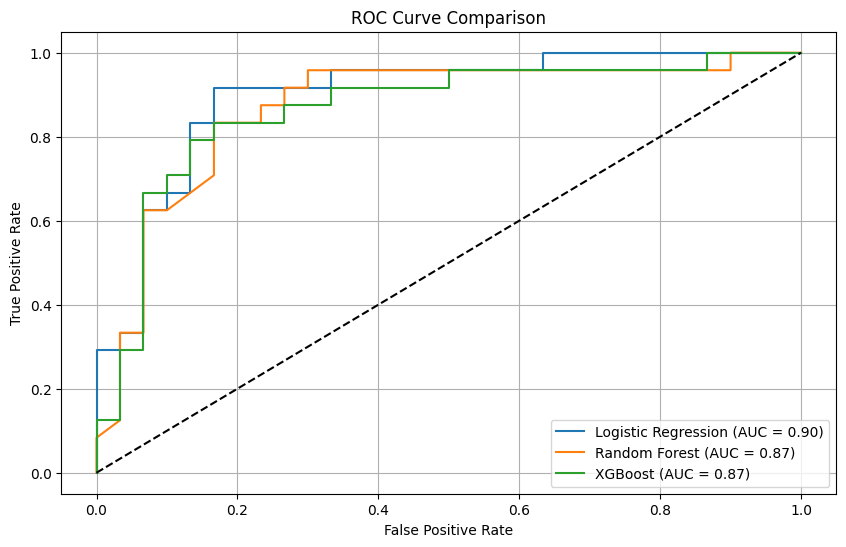

In [21]:
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


# 10. Kesimpulan

## ✅ Kesimpulan

📌 Final Decision:
Model terbaik berdasarkan evaluasi kuantitatif (akurasi dan f1-score) adalah **Logistic Regression** dengan akurasi 85%. Selain itu, model ini juga lebih sederhana dan lebih mudah digunakan untuk deployment pada aplikasi real-time seperti sistem deteksi dini penyakit jantung.

📌 Catatan:
Random Forest dan XGBoost memiliki performa yang sebanding, namun kompleksitasnya lebih tinggi dibanding Logistic Regression.

